In [1]:
# -*- encoding:urf-8 -*-
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table like and matrices
import pandas as pd
import numpy as np

# Modeling Helper
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno

# Configure visualization
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

train_path = '../input/train.csv'
test_path = '../input/test.csv'
hol_path = '../input/holiday.csv'
train_date_path = '../input/train_date.csv'
cache_path = '../input/cache/'
output_path = '../output/'
train_new_path = 'train_new_total.csv'
train_new = pd.read_csv(train_new_path)
train = pd.read_csv(train_path,encoding='gbk',engine='python')
test = pd.read_csv(test_path)
holiday = pd.read_csv(hol_path)

In [2]:
train.rename(columns = {'BigCode':'parClass','MidCode':'Class'},inplace = True)
# train

### 重新整合train集

In [3]:
train.loc[:,'saleCount'] = 1
coord_class = train.groupby(['Class','SaleDate'],as_index=False)['saleCount'].sum()
coord_parClass = train.groupby(['parClass','SaleDate'],as_index=False)['saleCount'].sum()
coord_parClass.rename(columns = {'parClass':'Class'},inplace=True)
train_new = pd.concat([coord_class,coord_parClass],axis = 0)
train_new.loc[:,'parClass'] = train_new.Class.map(lambda x: str(x)[:2])
train_new.loc[:,'parClass'] = train_new.parClass.map(lambda x: int(x))
train_new

,Class,SaleDate,saleCount,parClass
0,1001,20150101,3,10
1,1001,20150102,6,10
2,1001,20150103,7,10
3,1001,20150104,5,10
4,1001,20150105,9,10
5,1001,20150106,5,10
6,1001,20150107,28,10
7,1001,20150108,7,10
8,1001,20150109,4,10
9,1001,20150110,4,10


增加缺失日期

In [4]:
train_date = pd.read_csv(train_date_path)
l = train_new.Class.unique()
tmp1 = train_date.copy()
tmp2 = train_date.copy()
tmp1.loc[:,'Class'] = 0
for i in l:
    tmp2.loc[:,'Class'] = i
    tmp1 = pd.concat([tmp1,tmp2],axis=0)
tmp1 = tmp1[tmp1.Class > 0]
tmp1 = tmp1[['Class','SaleDate']]
tmp1 = pd.merge(tmp1, train_new, on=['Class','SaleDate'], how='left')
tmp1.saleCount.fillna(0,inplace=True)
tmp1.loc[:,'parClass'] = tmp1.Class.map(lambda x: str(x)[:2])
tmp1.parClass = tmp1.parClass.astype('int')
tmp1.saleCount = tmp1.saleCount.astype('int')
tmp1 = tmp1[['Class','parClass','SaleDate','saleCount']]
print 'Are count numbers equal: ', train.saleCount.sum() * 2 == tmp1.saleCount.sum()
train_new = tmp1.copy()
train_new

Are count numbers equal:  True


,Class,parClass,SaleDate,saleCount
0,1001,10,20150101,3
1,1001,10,20150102,6
2,1001,10,20150103,7
3,1001,10,20150104,5
4,1001,10,20150105,9
5,1001,10,20150106,5
6,1001,10,20150107,28
7,1001,10,20150108,7
8,1001,10,20150109,4
9,1001,10,20150110,4


### 节假日特征

In [5]:
train = pd.merge(train, holiday, on = 'SaleDate',how = 'left')
train_new = pd.merge(train_new, holiday, on = 'SaleDate',how = 'left')
test = pd.merge(test, holiday, on = 'SaleDate',how = 'left')

### 时间特征

In [6]:
def timeHandle(s):
    s = str(s)
    s = [s[:4],s[4:6],s[6:]]
    return '-'.join(s)

In [7]:
train.SaleDate = train.SaleDate.map(lambda x: timeHandle(x))
train.SaleDate = pd.to_datetime(train.SaleDate)
train.loc[:,'month'] = train.SaleDate.dt.month
train.loc[:,'dayOfWeek'] = train.SaleDate.dt.dayofweek
train.loc[:,'dayOfYear'] = train.SaleDate.dt.dayofyear
train.loc[:,'weekOfYear'] = train.SaleDate.dt.weekofyear

train_new.SaleDate = train_new.SaleDate.map(lambda x: timeHandle(x))
train_new.SaleDate = pd.to_datetime(train_new.SaleDate)
train_new.loc[:,'month'] = train_new.SaleDate.dt.month
train_new.loc[:,'dayOfWeek'] = train_new.SaleDate.dt.dayofweek
train_new.loc[:,'dayOfYear'] = train_new.SaleDate.dt.dayofyear
train_new.loc[:,'weekOfYear'] = train_new.SaleDate.dt.weekofyear

test.SaleDate = test.SaleDate.map(lambda x: timeHandle(x))
test.SaleDate = pd.to_datetime(test.SaleDate)
test.loc[:,'month'] = test.SaleDate.dt.month
test.loc[:,'dayOfWeek'] = test.SaleDate.dt.dayofweek
test.loc[:,'dayOfYear'] = test.SaleDate.dt.dayofyear
test.loc[:,'weekOfYear'] = test.SaleDate.dt.weekofyear

### 商品特征

#### 商品类别

In [8]:
cumDict = {u'一般商品':0.6089,u'生鲜':0.3782,u'联营商品':0.0129}
train.CumType = train.CumType.map(cumDict)

In [9]:
midClassSet = set(train.Class)
bigClassSet = set(train.parClass)
midClassDict = {}
bigClassDict = {}
classDict = {}
for eachMid in midClassSet:
    coord = train[train.Class == eachMid].groupby('CumType')['Class'].count()
    sum = 0 
    for i in range(len(coord)):
        sum += coord.index[i] *  coord.values[i]
    rate = round(sum / (1.0 * len(coord) + 1),2) ##修正
    midClassDict[eachMid] = rate
    classDict[eachMid] = rate
for eachBig in bigClassSet:
    coord = train[train.parClass == eachBig].groupby('CumType')['Class'].count()
    sum = 0 
    for i in range(len(coord)):
        sum += coord.index[i] *  coord.values[i]
    rate = round(sum / (1.0 * len(coord) + 1),2) 
    bigClassDict[eachBig] = rate
    classDict[eachBig] = rate
train.loc[:,'cumType'] = train.Class.map(midClassDict)
train.loc[:,'parCumType'] = train.parClass.map(bigClassDict)

train_new.loc[:,'cumType'] = train_new.Class.map(midClassDict)
train_new.loc[:,'parCumType'] = train_new.parClass.map(bigClassDict)

#最开始就需要改名
test.rename(columns={'Code':'Class'},inplace = True)
test.loc[:,'parClass'] = test.Class.map(lambda x: str(x)[:2])
test.loc[:,'parClass'] = test.parClass.map(lambda x: int(x))
test.loc[:,'cumType'] = test.Class.map(classDict)
test.loc[:,'parCumType'] = test.parClass.map(bigClassDict)

# 测试集中类cumType的缺失值处理,使用临近中类的type值
test = test.fillna(method = 'pad')

#### 商品热门指数

In [10]:
hotIndexDict = {}
parHotIndexDict = {}
totHotIndexDict = {}
totSaleCount = train.shape[0]
for eachMid in midClassSet:
    rate = round(train[train.Class == eachMid].shape[0] / (1.0 * totSaleCount),5)
    hotIndexDict[eachMid] = rate
    totHotIndexDict[eachMid] = rate
for eachBig in bigClassSet:
    rate = round(train[train.parClass == eachBig].shape[0] / (1.0 * totSaleCount),5)
    parHotIndexDict[eachBig] = rate
    totHotIndexDict[eachBig] = rate
    
train.loc[:,'hotIndex'] = train.Class.map(hotIndexDict)
train.loc[:,'parHotIndex'] = train.parClass.map(parHotIndexDict)

train_new.loc[:,'hotIndex'] = train.Class.map(hotIndexDict)
train_new.loc[:,'parHotIndex'] = train.parClass.map(parHotIndexDict)

test.loc[:,'hotIndex'] = train.Class.map(totHotIndexDict)
test.loc[:,'parHotIndex'] = train.parClass.map(parHotIndexDict)
test

,Class,SaleDate,SaleNum,holidayCluster,disHoliday,month,dayOfWeek,dayOfYear,weekOfYear,parClass,cumType,parCumType,hotIndex,parHotIndex
0,1001,2015-05-01,1,3,1.0,5,4,121,18,10,175.86,157.19,0.23107,0.33148
1,1001,2015-05-02,1,3,1.0,5,5,122,18,10,175.86,157.19,0.01721,0.13720
2,1001,2015-05-03,1,3,1.0,5,6,123,18,10,175.86,157.19,0.02758,0.11165
3,1001,2015-05-04,1,1,0.5,5,0,124,19,10,175.86,157.19,0.00145,0.11165
4,1001,2015-05-05,1,1,0.3,5,1,125,19,10,175.86,157.19,0.02758,0.11165
5,1001,2015-05-06,1,1,0.3,5,2,126,19,10,175.86,157.19,0.01446,0.07166
6,1001,2015-05-07,1,1,0.0,5,3,127,19,10,175.86,157.19,0.23107,0.33148
7,1001,2015-05-08,1,1,0.0,5,4,128,19,10,175.86,157.19,0.00677,0.13720
8,1001,2015-05-09,1,2,0.0,5,5,129,19,10,175.86,157.19,0.01042,0.02076
9,1001,2015-05-10,1,2,0.0,5,6,130,19,10,175.86,157.19,0.03410,0.20668


#### 商品工作日/非工作日销量统计值 - 用train_new表

In [11]:
train_new

,Class,parClass,SaleDate,saleCount,holidayCluster,disHoliday,month,dayOfWeek,dayOfYear,weekOfYear,cumType,parCumType,hotIndex,parHotIndex
0,1001,10,2015-01-01,3,3,1.0,1,3,1,1,175.86,157.19,0.23107,0.33148
1,1001,10,2015-01-02,6,3,1.0,1,4,2,1,175.86,157.19,0.01721,0.13720
2,1001,10,2015-01-03,7,3,1.0,1,5,3,1,175.86,157.19,0.02758,0.11165
3,1001,10,2015-01-04,5,1,0.5,1,6,4,1,175.86,157.19,0.00145,0.11165
4,1001,10,2015-01-05,9,1,0.3,1,0,5,2,175.86,157.19,0.02758,0.11165
5,1001,10,2015-01-06,5,1,0.3,1,1,6,2,175.86,157.19,0.01446,0.07166
6,1001,10,2015-01-07,28,1,0.0,1,2,7,2,175.86,157.19,0.23107,0.33148
7,1001,10,2015-01-08,7,1,0.0,1,3,8,2,175.86,157.19,0.00677,0.13720
8,1001,10,2015-01-09,4,1,0.0,1,4,9,2,175.86,157.19,0.01042,0.02076
9,1001,10,2015-01-10,4,2,0.0,1,5,10,2,175.86,157.19,0.03410,0.20668


In [12]:
train_wk = train_new[train_new.holidayCluster == 1]
train_hol = train_new[train_new.holidayCluster != 1]

coord = train_wk.groupby('Class',as_index = False)['saleCount'].agg({'wkDaySaleCount_median':'median'})
train_new = pd.merge(train_new, coord, on = 'Class', how='left')
test = pd.merge(test, coord, on = 'Class', how='left')
coord = train_wk.groupby('Class',as_index = False)['saleCount'].agg({'wkDaySaleCount_mean':'mean'})
train_new = pd.merge(train_new, coord, on = 'Class', how='left')
test = pd.merge(test, coord, on = 'Class', how='left')
coord = train_wk.groupby('Class',as_index = False)['saleCount'].agg({'wkDaySaleCount_max':'max'})
train_new = pd.merge(train_new, coord, on = 'Class', how='left')
test = pd.merge(test, coord, on = 'Class', how='left')
coord = train_wk.groupby('Class',as_index = False)['saleCount'].agg({'wkDaySaleCount_min':'min'})
train_new = pd.merge(train_new, coord, on = 'Class', how='left')
test = pd.merge(test, coord, on = 'Class', how='left')

coord = train_hol.groupby('Class',as_index = False)['saleCount'].agg({'holDaySaleCount_median':'median'})
train_new = pd.merge(train_new, coord, on = 'Class', how='left')
test = pd.merge(test, coord, on = 'Class', how='left')
coord = train_hol.groupby('Class',as_index = False)['saleCount'].agg({'holDaySaleCount_mean':'mean'})
train_new = pd.merge(train_new, coord, on = 'Class', how='left')
test = pd.merge(test, coord, on = 'Class', how='left')
coord = train_hol.groupby('Class',as_index = False)['saleCount'].agg({'holDaySaleCount_max':'max'})
train_new = pd.merge(train_new, coord, on = 'Class', how='left')
test = pd.merge(test, coord, on = 'Class', how='left')
coord = train_hol.groupby('Class',as_index = False)['saleCount'].agg({'holDaySaleCount_min':'min'})
train_new = pd.merge(train_new, coord, on = 'Class', how='left')
test = pd.merge(test, coord, on = 'Class', how='left')

coord = train_hol.groupby('Class',as_index=False)['saleCount'].agg({'holSaleCount':'count'})
train_new = pd.merge(train_new, coord, on = 'Class', how='left')
coord = train_wk.groupby('Class',as_index=False)['saleCount'].agg({'wkSaleCount':'count'})
train_new = pd.merge(train_new, coord, on = 'Class', how='left')
train_new.loc[:,'wkHolRatio'] = train_new['wkSaleCount'] / (1.0 * train_new['holSaleCount'])

coord = train_new.groupby('Class',as_index=False)['wkHolRatio'].mean()
test = pd.merge(test, coord, on = 'Class', how='left')

del train_new['wkSaleCount'],train_new['holSaleCount']
del train_wk,train_hol

train_new

,Class,parClass,SaleDate,saleCount,holidayCluster,disHoliday,month,dayOfWeek,dayOfYear,weekOfYear,...,parHotIndex,wkDaySaleCount_median,wkDaySaleCount_mean,wkDaySaleCount_max,wkDaySaleCount_min,holDaySaleCount_median,holDaySaleCount_mean,holDaySaleCount_max,holDaySaleCount_min,wkHolRatio
0,1001,10,2015-01-01,3,3,1.0,1,3,1,1,...,0.33148,7.5,8.95,35,0,5.0,5.350,16,0,2.0
1,1001,10,2015-01-02,6,3,1.0,1,4,2,1,...,0.13720,7.5,8.95,35,0,5.0,5.350,16,0,2.0
2,1001,10,2015-01-03,7,3,1.0,1,5,3,1,...,0.11165,7.5,8.95,35,0,5.0,5.350,16,0,2.0
3,1001,10,2015-01-04,5,1,0.5,1,6,4,1,...,0.11165,7.5,8.95,35,0,5.0,5.350,16,0,2.0
4,1001,10,2015-01-05,9,1,0.3,1,0,5,2,...,0.11165,7.5,8.95,35,0,5.0,5.350,16,0,2.0
5,1001,10,2015-01-06,5,1,0.3,1,1,6,2,...,0.07166,7.5,8.95,35,0,5.0,5.350,16,0,2.0
6,1001,10,2015-01-07,28,1,0.0,1,2,7,2,...,0.33148,7.5,8.95,35,0,5.0,5.350,16,0,2.0
7,1001,10,2015-01-08,7,1,0.0,1,3,8,2,...,0.13720,7.5,8.95,35,0,5.0,5.350,16,0,2.0
8,1001,10,2015-01-09,4,1,0.0,1,4,9,2,...,0.02076,7.5,8.95,35,0,5.0,5.350,16,0,2.0
9,1001,10,2015-01-10,4,2,0.0,1,5,10,2,...,0.20668,7.5,8.95,35,0,5.0,5.350,16,0,2.0


#### 价格特征

In [13]:
coord_class = train.groupby('Class',as_index = False)['UnitPrice'].agg({'price_mean':'mean'})
coord_par_class = train.groupby('parClass',as_index = False)['UnitPrice'].agg({'price_mean':'mean'})
coord_par_class.rename(columns = {'parClass':'Class'},inplace = True)
coord = pd.concat([coord_class, coord_par_class],axis = 0)
train_new = pd.merge(train_new, coord, on = 'Class', how = 'left')
test = pd.merge(test, coord, on = 'Class', how = 'left')

coord_class = train.groupby('Class',as_index = False)['UnitPrice'].agg({'price_median':'median'})
coord_par_class = train.groupby('parClass',as_index = False)['UnitPrice'].agg({'price_median':'median'})
coord_par_class.rename(columns = {'parClass':'Class'},inplace = True)
coord = pd.concat([coord_class, coord_par_class],axis = 0)
train_new = pd.merge(train_new, coord, on = 'Class', how = 'left')
test = pd.merge(test, coord, on = 'Class', how = 'left')

#### 促销特征

商品促销时销量与不促销时销量的比值 

In [14]:
coord_class_bonus_count = train[train['Coupon'] == 1].groupby('Class',as_index=False)['saleCount'].agg({'classBonusSaleCount':'count'})
coord_parclass_bonus_count = train[train['Coupon'] == 1].groupby('parClass',as_index=False)['saleCount'].agg({'classBonusSaleCount':'count'})
coord_parclass_bonus_count.rename(columns={'parClass':'Class'},inplace = True)
coord = pd.concat([coord_class_bonus_count,coord_parclass_bonus_count],axis=0)
train_new = pd.merge(train_new, coord, on = 'Class', how = 'left')
test = pd.merge(test, coord, on = 'Class', how = 'left')
train_new['classBonusSaleCount'] = train_new['classBonusSaleCount'].fillna(0)
test['classBonusSaleCount'] = test['classBonusSaleCount'].fillna(0)

coord_class_notbonus_count = train[train['Coupon'] == 0].groupby('Class',as_index=False)['saleCount'].agg({'classNotBonusSaleCount':'count'})
coord_parclass_notbonus_count = train[train['Coupon'] == 0].groupby('parClass',as_index=False)['saleCount'].agg({'classNotBonusSaleCount':'count'})
coord_parclass_notbonus_count.rename(columns={'parClass':'Class'},inplace = True)
coord = pd.concat([coord_class_notbonus_count,coord_parclass_notbonus_count],axis=0)
train_new = pd.merge(train_new, coord, on = 'Class', how = 'left')
test = pd.merge(test, coord, on = 'Class', how = 'left')
train_new['classNotBonusSaleCount'] = train_new['classNotBonusSaleCount'].fillna(1)
test['classNotBonusSaleCount'] = test['classNotBonusSaleCount'].fillna(1)

# 计算促销与非促销的比值
train_new.loc[:,'bonusRatio'] = np.round(train_new['classBonusSaleCount'] / (1.0 * train_new['classNotBonusSaleCount']),4)
del train_new['classBonusSaleCount'],train_new['classNotBonusSaleCount']
test.loc[:,'bonusRatio'] = np.round(test['classBonusSaleCount'] / (1.0 * test['classNotBonusSaleCount']),4)
del test['classBonusSaleCount'],test['classNotBonusSaleCount']

商品节假日时促销销量与不促销销量的比值

In [15]:
train_wk = train[train.holidayCluster == 1]
train_hol = train[train.holidayCluster != 1]

coord_class_bonus_count = train_hol[train_hol['Coupon'] == 1].groupby('Class',as_index=False)['saleCount'].agg({'classBonusSaleCount':'count'})
coord_parclass_bonus_count = train_hol[train_hol['Coupon'] == 1].groupby('parClass',as_index=False)['saleCount'].agg({'classBonusSaleCount':'count'})
coord_parclass_bonus_count.rename(columns={'parClass':'Class'},inplace = True)
coord = pd.concat([coord_class_bonus_count,coord_parclass_bonus_count],axis=0)
train_new = pd.merge(train_new, coord, on = 'Class', how = 'left')
test = pd.merge(test, coord, on = 'Class', how = 'left')
train_new['classBonusSaleCount'] = train_new['classBonusSaleCount'].fillna(0)
test['classBonusSaleCount'] = test['classBonusSaleCount'].fillna(0)

coord_class_notbonus_count = train_hol[train_hol['Coupon'] == 0].groupby('Class',as_index=False)['saleCount'].agg({'classNotBonusSaleCount':'count'})
coord_parclass_notbonus_count = train_hol[train_hol['Coupon'] == 0].groupby('parClass',as_index=False)['saleCount'].agg({'classNotBonusSaleCount':'count'})
coord_parclass_notbonus_count.rename(columns={'parClass':'Class'},inplace = True)
coord = pd.concat([coord_class_notbonus_count,coord_parclass_notbonus_count],axis=0)
train_new = pd.merge(train_new, coord, on = 'Class', how = 'left')
test = pd.merge(test, coord, on = 'Class', how = 'left')
train_new['classNotBonusSaleCount'] = train_new['classNotBonusSaleCount'].fillna(1)
test['classNotBonusSaleCount'] = test['classNotBonusSaleCount'].fillna(1)

# 计算促销与非促销的比值
train_new.loc[:,'bonusHolRatio'] = np.round(train_new['classBonusSaleCount'] / (1.0 * train_new['classNotBonusSaleCount']),4)
del train_new['classBonusSaleCount'],train_new['classNotBonusSaleCount']
test.loc[:,'bonusHolRatio'] = np.round(test['classBonusSaleCount'] / (1.0 * test['classNotBonusSaleCount']),4)
del test['classBonusSaleCount'],test['classNotBonusSaleCount']

商品非节假日时促销销量与不促销销量的比值

In [16]:
coord_class_bonus_count = train_wk[train_wk['Coupon'] == 1].groupby('Class',as_index=False)['saleCount'].agg({'classBonusSaleCount':'count'})
coord_parclass_bonus_count = train_wk[train_wk['Coupon'] == 1].groupby('parClass',as_index=False)['saleCount'].agg({'classBonusSaleCount':'count'})
coord_parclass_bonus_count.rename(columns={'parClass':'Class'},inplace = True)
coord = pd.concat([coord_class_bonus_count,coord_parclass_bonus_count],axis=0)
train_new = pd.merge(train_new, coord, on = 'Class', how = 'left')
test = pd.merge(test, coord, on = 'Class', how = 'left')
train_new['classBonusSaleCount'] = train_new['classBonusSaleCount'].fillna(0)
test['classBonusSaleCount'] = test['classBonusSaleCount'].fillna(0)

coord_class_notbonus_count = train_wk[train_wk['Coupon'] == 0].groupby('Class',as_index=False)['saleCount'].agg({'classNotBonusSaleCount':'count'})
coord_parclass_notbonus_count = train_wk[train_wk['Coupon'] == 0].groupby('parClass',as_index=False)['saleCount'].agg({'classNotBonusSaleCount':'count'})
coord_parclass_notbonus_count.rename(columns={'parClass':'Class'},inplace = True)
coord = pd.concat([coord_class_notbonus_count,coord_parclass_notbonus_count],axis=0)
train_new = pd.merge(train_new, coord, on = 'Class', how = 'left')
test = pd.merge(test, coord, on = 'Class', how = 'left')
train_new['classNotBonusSaleCount'] = train_new['classNotBonusSaleCount'].fillna(1)
test['classNotBonusSaleCount'] = test['classNotBonusSaleCount'].fillna(1)

# 计算促销与非促销的比值
train_new.loc[:,'bonusNotHolRatio'] = np.round(train_new['classBonusSaleCount'] / (1.0 * train_new['classNotBonusSaleCount']),4)
del train_new['classBonusSaleCount'],train_new['classNotBonusSaleCount']
test.loc[:,'bonusNotHolRatio'] = np.round(test['classBonusSaleCount'] / (1.0 * test['classNotBonusSaleCount']),4)
del test['classBonusSaleCount'],test['classNotBonusSaleCount']

del train_wk,train_hol

商品周几促销的比例

In [17]:
train_coupon = train[train.Coupon == 1]
coord = train_coupon.groupby(['Class','dayOfWeek'],as_index=False)['dayOfWeek'].agg({'dayOfWeekCount':'count'})
var = train_coupon.groupby(['Class'],as_index=False)['dayOfWeek'].agg({'classCouponCount':'count'})
coord = pd.merge(coord, var, on = 'Class',how='left' )
coord.loc[:,'bonusWeekProb'] = coord['dayOfWeekCount'] / np.round((1.0 * coord['classCouponCount']))
coord_c = coord.copy()

coord = train_coupon.groupby(['parClass','dayOfWeek'],as_index=False)['dayOfWeek'].agg({'dayOfWeekCount':'count'})
var = train_coupon.groupby(['parClass'],as_index=False)['dayOfWeek'].agg({'classCouponCount':'count'})
coord = pd.merge(coord, var, on = 'parClass',how='left' )
coord.loc[:,'bonusWeekProb'] = coord['dayOfWeekCount'] / np.round((1.0 * coord['classCouponCount']))
coord.rename(columns={'parClass':'Class'},inplace=True)
coord_pc = coord.copy()

coord = pd.concat([coord_c,coord_pc],axis=0)

train_new = pd.merge(train_new, coord[['Class','dayOfWeek','bonusWeekProb']], on = ['Class','dayOfWeek'],how='left')
train_new['bonusWeekProb'] = train_new['bonusWeekProb'].fillna(0)

test = pd.merge(test, coord[['Class','dayOfWeek','bonusWeekProb']], on = ['Class','dayOfWeek'],how='left')
test['bonusWeekProb'] = test['bonusWeekProb'].fillna(0)

In [18]:
test

,Class,SaleDate,SaleNum,holidayCluster,disHoliday,month,dayOfWeek,dayOfYear,weekOfYear,parClass,...,holDaySaleCount_mean,holDaySaleCount_max,holDaySaleCount_min,wkHolRatio,price_mean,price_median,bonusRatio,bonusHolRatio,bonusNotHolRatio,bonusWeekProb
0,1001,2015-05-01,1,3,1.0,5,4,121,18,10,...,5.350,16.0,0.0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
1,1001,2015-05-02,1,3,1.0,5,5,122,18,10,...,5.350,16.0,0.0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
2,1001,2015-05-03,1,3,1.0,5,6,123,18,10,...,5.350,16.0,0.0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
3,1001,2015-05-04,1,1,0.5,5,0,124,19,10,...,5.350,16.0,0.0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
4,1001,2015-05-05,1,1,0.3,5,1,125,19,10,...,5.350,16.0,0.0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
5,1001,2015-05-06,1,1,0.3,5,2,126,19,10,...,5.350,16.0,0.0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
6,1001,2015-05-07,1,1,0.0,5,3,127,19,10,...,5.350,16.0,0.0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
7,1001,2015-05-08,1,1,0.0,5,4,128,19,10,...,5.350,16.0,0.0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
8,1001,2015-05-09,1,2,0.0,5,5,129,19,10,...,5.350,16.0,0.0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
9,1001,2015-05-10,1,2,0.0,5,6,130,19,10,...,5.350,16.0,0.0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000


### 测试集分离

In [19]:
week2 = ['2015-05-08','2015-05-09','2015-05-10','2015-05-11','2015-05-12','2015-05-13','2015-05-14']
week3 = ['2015-05-15','2015-05-16','2015-05-17','2015-05-18','2015-05-19','2015-05-20','2015-05-21']
week4 = ['2015-05-22','2015-05-23','2015-05-24','2015-05-25','2015-05-26','2015-05-27','2015-05-28']
test.loc[:,'saleCount'] = 0
del test['SaleNum']
test_1 = test[test['SaleDate'] <= '2015-05-07']
test_2 = test[test['SaleDate'].isin(week2)]
test_3 = test[test['SaleDate'].isin(week3)]
test_4 = test[test['SaleDate'].isin(week4)]
test_5 = test[test['SaleDate'] >= '2015-05-29']
test_1.to_csv(output_path + 'week1.csv',index = False)
test_2.to_csv(output_path + 'week2.csv',index = False)
test_3.to_csv(output_path + 'week3.csv',index = False)
test_4.to_csv(output_path + 'week4.csv',index = False)
test_5.to_csv(output_path + 'week5.csv',index = False)
print  np.setdiff1d(test.columns,train_new.columns)

[]


### 提取滚动特征
#### 第一周滚动特征提取

In [20]:
train_test = pd.concat([train_new, test_1], axis = 0)
train_test.head(1)

,Class,SaleDate,bonusHolRatio,bonusNotHolRatio,bonusRatio,bonusWeekProb,cumType,dayOfWeek,dayOfYear,disHoliday,...,parHotIndex,price_mean,price_median,saleCount,weekOfYear,wkDaySaleCount_max,wkDaySaleCount_mean,wkDaySaleCount_median,wkDaySaleCount_min,wkHolRatio
0,1001,2015-01-01,0.0,0.0,0.0,0.0,175.86,3,1,1.0,...,0.33148,29.609892,29.8,3,1,35.0,8.95,7.5,0.0,2.0


#### 滚动热门指数

In [21]:
# 类别上周，上上周，上个月总销量
lastWeekSaleCount_o = train_test.groupby(['Class','weekOfYear'],as_index=False)['saleCount'].agg({'lastWeekSaleCount':'sum'})
last2WeekSaleCount_o = train_test.groupby(['Class','weekOfYear'],as_index=False)['saleCount'].agg({'last2WeekSaleCount':'sum'})
lastMonthSaleCount_o = train_test.groupby(['Class','month'],as_index=False)['saleCount'].agg({'lastMonthSaleCount':'sum'})
lastWeekSaleCount = lastWeekSaleCount_o.shift(1)
last2WeekSaleCount = last2WeekSaleCount_o.shift(2)
lastMonthSaleCount = lastMonthSaleCount_o.shift(1)
lastWeekSaleCount.weekOfYear = lastWeekSaleCount_o.weekOfYear
last2WeekSaleCount.weekOfYear = last2WeekSaleCount_o.weekOfYear
lastMonthSaleCount.month = lastMonthSaleCount_o.month
lastWeekSaleCount.Class = lastWeekSaleCount_o.Class
last2WeekSaleCount.Class = last2WeekSaleCount_o.Class
lastMonthSaleCount.Class = lastMonthSaleCount_o.Class
lastWeekSaleCount.lastWeekSaleCount.fillna(0,inplace=True)
last2WeekSaleCount.last2WeekSaleCount.fillna(0,inplace=True)
lastMonthSaleCount.lastMonthSaleCount.fillna(0,inplace = True)

# 上周，上上周，上个月总销量
lastWeekTotSaleCount_o = train_test.groupby(['weekOfYear'],as_index=False)['saleCount'].agg({'lastWeekTotSaleCount':'sum'})
last2WeekTotSaleCount_o = train_test.groupby(['weekOfYear'],as_index=False)['saleCount'].agg({'last2WeekTotSaleCount':'sum'})
lastMonthTotSaleCount_o = train_test.groupby(['month'],as_index=False)['saleCount'].agg({'lastMonthTotSaleCount':'sum'})
lastWeekTotSaleCount = lastWeekTotSaleCount_o.shift(1)
last2WeekTotSaleCount = last2WeekTotSaleCount_o.shift(2)
lastMonthTotSaleCount = lastMonthTotSaleCount_o.shift(1)
lastWeekTotSaleCount.weekOfYear = lastWeekTotSaleCount_o.weekOfYear
last2WeekTotSaleCount.weekOfYear = last2WeekTotSaleCount_o.weekOfYear
lastMonthTotSaleCount.month = lastMonthTotSaleCount_o.month
lastWeekTotSaleCount.lastWeekTotSaleCount.fillna(1,inplace=True)
last2WeekTotSaleCount.last2WeekTotSaleCount.fillna(1,inplace=True)
lastMonthTotSaleCount.lastMonthTotSaleCount.fillna(1,inplace = True)

lastWeekSaleCount = pd.merge(lastWeekSaleCount,lastWeekTotSaleCount, on = 'weekOfYear',how = 'left')
last2WeekSaleCount = pd.merge(last2WeekSaleCount,last2WeekTotSaleCount, on = 'weekOfYear',how = 'left')
lastMonthSaleCount = pd.merge(lastMonthSaleCount,lastMonthTotSaleCount, on = 'month',how = 'left')

# 用于合并
lastWeekSaleCount.loc[:,'hotPast1WeekIndex'] = np.round(lastWeekSaleCount.lastWeekSaleCount / (1.0 * lastWeekSaleCount.lastWeekTotSaleCount),4)
last2WeekSaleCount.loc[:,'hotPast2WeekIndex'] = np.round(last2WeekSaleCount.last2WeekSaleCount / (1.0 * last2WeekSaleCount.last2WeekTotSaleCount),4)
lastMonthSaleCount.loc[:,'hotPast1MonthIndex'] = np.round(lastMonthSaleCount.lastMonthSaleCount / (1.0 * lastMonthSaleCount.lastMonthTotSaleCount),4)


# 父类
# 父类别上周，上上周，上个月总销量
parLastWeekSaleCount_o = train_test.groupby(['parClass','weekOfYear'],as_index=False)['saleCount'].agg({'lastWeekSaleCount':'sum'})
parLast2WeekSaleCount_o = train_test.groupby(['parClass','weekOfYear'],as_index=False)['saleCount'].agg({'last2WeekSaleCount':'sum'})
parLastMonthSaleCount_o = train_test.groupby(['parClass','month'],as_index=False)['saleCount'].agg({'lastMonthSaleCount':'sum'})
parLastWeekSaleCount =  parLastWeekSaleCount_o.shift(1)
parLast2WeekSaleCount = parLast2WeekSaleCount_o.shift(2)
parLastMonthSaleCount = parLastMonthSaleCount_o.shift(1)
parLastWeekSaleCount.weekOfYear =  parLastWeekSaleCount_o.weekOfYear
parLast2WeekSaleCount.weekOfYear = parLast2WeekSaleCount_o.weekOfYear
parLastMonthSaleCount.month = parLastMonthSaleCount_o.month
parLastWeekSaleCount.parClass  =  parLastWeekSaleCount_o.parClass
parLast2WeekSaleCount.parClass = parLast2WeekSaleCount_o.parClass
parLastMonthSaleCount.parClass = parLastMonthSaleCount_o.parClass
parLastWeekSaleCount.lastWeekSaleCount.fillna(0,inplace=True)
parLast2WeekSaleCount.last2WeekSaleCount.fillna(0,inplace=True)
parLastMonthSaleCount.lastMonthSaleCount.fillna(0,inplace = True)

# 上周总销量
# lastWeekTotSaleCount_o = train_test.groupby(['weekOfYear'],as_index=False)['saleCount'].agg({'lastWeekTotSaleCount':'sum'})
# last2WeekTotSaleCount_o = train_test.groupby(['weekOfYear'],as_index=False)['saleCount'].agg({'last2WeekTotSaleCount':'sum'})
# lastMonthTotSaleCount_o = train_test.groupby(['month'],as_index=False)['saleCount'].agg({'lastMonthTotSaleCount':'sum'})
# lastWeekTotSaleCount = lastWeekTotSaleCount_o.shift(1)
# last2WeekTotSaleCount = last2WeekTotSaleCount_o.shift(2)
# lastMonthTotSaleCount = lastMonthTotSaleCount_o.shift(1)
# lastWeekTotSaleCount.weekOfYear = lastWeekTotSaleCount_o.weekOfYear
# last2WeekTotSaleCount.weekOfYear = last2WeekTotSaleCount_o.weekOfYear
# lastMonthTotSaleCount.month = lastMonthTotSaleCount_o.month
# lastWeekTotSaleCount.lastWeekTotSaleCount.fillna(1,inplace=True)
# last2WeekTotSaleCount.last2WeekTotSaleCount.fillna(1,inplace=True)
# lastMonthTotSaleCount.lastMonthTotSaleCount.fillna(1,inplace = True)

parLastWeekSaleCount = pd.merge (parLastWeekSaleCount,lastWeekTotSaleCount, on = 'weekOfYear',how = 'left')
parLast2WeekSaleCount = pd.merge(parLast2WeekSaleCount,last2WeekTotSaleCount, on = 'weekOfYear',how = 'left')
parLastMonthSaleCount = pd.merge(parLastMonthSaleCount,lastMonthTotSaleCount, on = 'month',how = 'left')

# 用于合并
parLastWeekSaleCount.loc [:,'parHotPast1WeekIndex']  = np.round(parLastWeekSaleCount.lastWeekSaleCount /   (1.0 * parLastWeekSaleCount.lastWeekTotSaleCount),4)
parLast2WeekSaleCount.loc[:,'parHotPast2WeekIndex']  = np.round(parLast2WeekSaleCount.last2WeekSaleCount / (1.0 * parLast2WeekSaleCount.last2WeekTotSaleCount),4)
parLastMonthSaleCount.loc[:,'parHotPast1MonthIndex'] = np.round(parLastMonthSaleCount.lastMonthSaleCount / (1.0 * parLastMonthSaleCount.lastMonthTotSaleCount),4)

# 合并 train_test 
del  lastWeekSaleCount['lastWeekSaleCount' ],   lastWeekSaleCount['lastWeekTotSaleCount']
del last2WeekSaleCount['last2WeekSaleCount'],last2WeekSaleCount['last2WeekTotSaleCount']
del lastMonthSaleCount['lastMonthSaleCount'],lastMonthSaleCount['lastMonthTotSaleCount']
del parLastWeekSaleCount ['lastWeekSaleCount' ],  parLastWeekSaleCount['lastWeekTotSaleCount']
del parLast2WeekSaleCount['last2WeekSaleCount'],parLast2WeekSaleCount['last2WeekTotSaleCount']
del parLastMonthSaleCount['lastMonthSaleCount'],parLastMonthSaleCount['lastMonthTotSaleCount']
tmp = pd.merge(train_test,lastWeekSaleCount,on=['Class','weekOfYear'],how='left')
tmp = pd.merge(tmp,last2WeekSaleCount,on=['Class','weekOfYear'],how='left')
tmp = pd.merge(tmp,lastMonthSaleCount,on=['Class','month'],how='left')
tmp = pd.merge(tmp,parLastWeekSaleCount,on=['parClass','weekOfYear'],how='left')
tmp = pd.merge(tmp,parLast2WeekSaleCount,on=['parClass','weekOfYear'],how='left')
tmp = pd.merge(tmp,parLastMonthSaleCount,on=['parClass','month'],how='left')
print 'new added features:',np.setdiff1d(tmp.columns, train_test.columns)
train_test = tmp.copy()
train_test

new added features: ['hotPast1MonthIndex' 'hotPast1WeekIndex' 'hotPast2WeekIndex'
 'parHotPast1MonthIndex' 'parHotPast1WeekIndex' 'parHotPast2WeekIndex']


,Class,SaleDate,bonusHolRatio,bonusNotHolRatio,bonusRatio,bonusWeekProb,cumType,dayOfWeek,dayOfYear,disHoliday,...,wkDaySaleCount_mean,wkDaySaleCount_median,wkDaySaleCount_min,wkHolRatio,hotPast1WeekIndex,hotPast2WeekIndex,hotPast1MonthIndex,parHotPast1WeekIndex,parHotPast2WeekIndex,parHotPast1MonthIndex
0,1001,2015-01-01,0.0000,0.0000,0.0000,0.000000,175.86,3,1,1.0,...,8.9500,7.5,0.0,2.0,0.0000,22.0000,0.0000,0.0000,0.0000,0.0000
1,1001,2015-01-02,0.0000,0.0000,0.0000,0.000000,175.86,4,2,1.0,...,8.9500,7.5,0.0,2.0,0.0000,22.0000,0.0000,0.0000,0.0000,0.0000
2,1001,2015-01-03,0.0000,0.0000,0.0000,0.000000,175.86,5,3,1.0,...,8.9500,7.5,0.0,2.0,0.0000,22.0000,0.0000,0.0000,0.0000,0.0000
3,1001,2015-01-04,0.0000,0.0000,0.0000,0.000000,175.86,6,4,0.5,...,8.9500,7.5,0.0,2.0,0.0000,22.0000,0.0000,0.0000,0.0000,0.0000
4,1001,2015-01-05,0.0000,0.0000,0.0000,0.000000,175.86,0,5,0.3,...,8.9500,7.5,0.0,2.0,0.0082,0.0000,0.0000,0.0235,0.0000,0.0000
5,1001,2015-01-06,0.0000,0.0000,0.0000,0.000000,175.86,1,6,0.3,...,8.9500,7.5,0.0,2.0,0.0082,0.0000,0.0000,0.0235,0.0000,0.0000
6,1001,2015-01-07,0.0000,0.0000,0.0000,0.000000,175.86,2,7,0.0,...,8.9500,7.5,0.0,2.0,0.0082,0.0000,0.0000,0.0235,0.0000,0.0000
7,1001,2015-01-08,0.0000,0.0000,0.0000,0.000000,175.86,3,8,0.0,...,8.9500,7.5,0.0,2.0,0.0082,0.0000,0.0000,0.0235,0.0000,0.0000
8,1001,2015-01-09,0.0000,0.0000,0.0000,0.000000,175.86,4,9,0.0,...,8.9500,7.5,0.0,2.0,0.0082,0.0000,0.0000,0.0235,0.0000,0.0000
9,1001,2015-01-10,0.0000,0.0000,0.0000,0.000000,175.86,5,10,0.0,...,8.9500,7.5,0.0,2.0,0.0082,0.0000,0.0000,0.0235,0.0000,0.0000


#### 价格统计量滚动特征

In [22]:
# 类别上周，上上周，上个月销量统计量 - 均值
lastWeekSaleCount_mean_o = train_test.groupby(['Class','weekOfYear'],as_index=False)['saleCount'].agg({'lastWeekSaleCount_mean':'mean'})
last2WeekSaleCount_mean_o = train_test.groupby(['Class','weekOfYear'],as_index=False)['saleCount'].agg({'last2WeekSaleCount_mean':'mean'})
lastMonthSaleCount_mean_o = train_test.groupby(['Class','month'],as_index=False)['saleCount'].agg({'lastMonthSaleCount_mean':'mean'})
lastWeekSaleCount_mean   = lastWeekSaleCount_mean_o.shift(1)
last2WeekSaleCount_mean = last2WeekSaleCount_mean_o.shift(2)
lastMonthSaleCount_mean = lastMonthSaleCount_mean_o.shift(1)
lastWeekSaleCount_mean.weekOfYear  = lastWeekSaleCount_mean_o.weekOfYear
last2WeekSaleCount_mean.weekOfYear = last2WeekSaleCount_mean_o.weekOfYear
lastMonthSaleCount_mean.month      = lastMonthSaleCount_mean_o.month
lastWeekSaleCount_mean.Class =  lastWeekSaleCount_mean_o.Class
last2WeekSaleCount_mean.Class = last2WeekSaleCount_mean_o.Class
lastMonthSaleCount_mean.Class = lastMonthSaleCount_mean_o.Class
lastWeekSaleCount_mean.lastWeekSaleCount_mean.fillna(0,inplace=True)
last2WeekSaleCount_mean.last2WeekSaleCount_mean.fillna(0,inplace=True)
lastMonthSaleCount_mean.lastMonthSaleCount_mean.fillna(0,inplace = True)

# 用于合并
lastWeekSaleCount_mean
last2WeekSaleCount_mean
lastMonthSaleCount_mean

# 父类
# 父类别上周，上上周，上个月销量统计量 - 中位数
lastWeekSaleCount_median_o = train_test.groupby(['Class','weekOfYear'],as_index=False)['saleCount'].agg({'lastWeekSaleCount_median':'median'})
last2WeekSaleCount_median_o = train_test.groupby(['Class','weekOfYear'],as_index=False)['saleCount'].agg({'last2WeekSaleCount_median':'median'})
lastMonthSaleCount_median_o = train_test.groupby(['Class','month'],as_index=False)['saleCount'].agg({'lastMonthSaleCount_median':'median'})
lastWeekSaleCount_median   = lastWeekSaleCount_median_o.shift(1)
last2WeekSaleCount_median = last2WeekSaleCount_median_o.shift(2)
lastMonthSaleCount_median = lastMonthSaleCount_median_o.shift(1)
lastWeekSaleCount_median.weekOfYear  = lastWeekSaleCount_median_o.weekOfYear
last2WeekSaleCount_median.weekOfYear = last2WeekSaleCount_median_o.weekOfYear
lastMonthSaleCount_median.month      = lastMonthSaleCount_median_o.month
lastWeekSaleCount_median.Class =  lastWeekSaleCount_median_o.Class
last2WeekSaleCount_median.Class = last2WeekSaleCount_median_o.Class
lastMonthSaleCount_median.Class = lastMonthSaleCount_median_o.Class
lastWeekSaleCount_median.lastWeekSaleCount_median.fillna(0,inplace=True)
last2WeekSaleCount_median.last2WeekSaleCount_median.fillna(0,inplace=True)
lastMonthSaleCount_median.lastMonthSaleCount_median.fillna(0,inplace = True)

# 用于合并
lastWeekSaleCount_median
last2WeekSaleCount_median
lastMonthSaleCount_median


# 父类别上周，上上周，上个月销量统计量 - 均值
parLastWeekSaleCount_mean_o = train_test.groupby(['parClass','weekOfYear'],as_index=False)['saleCount'].agg({'parLastWeekSaleCount_mean':'mean'})
parLast2WeekSaleCount_mean_o = train_test.groupby(['parClass','weekOfYear'],as_index=False)['saleCount'].agg({'parLast2WeekSaleCount_mean':'mean'})
parLastMonthSaleCount_mean_o = train_test.groupby(['parClass','month'],as_index=False)['saleCount'].agg({'parLastMonthSaleCount_mean':'mean'})
parLastWeekSaleCount_mean   = parLastWeekSaleCount_mean_o.shift(1)
parLast2WeekSaleCount_mean = parLast2WeekSaleCount_mean_o.shift(2)
parLastMonthSaleCount_mean = parLastMonthSaleCount_mean_o.shift(1)
parLastWeekSaleCount_mean.weekOfYear  = parLastWeekSaleCount_mean_o.weekOfYear
parLast2WeekSaleCount_mean.weekOfYear = parLast2WeekSaleCount_mean_o.weekOfYear
parLastMonthSaleCount_mean.month      = parLastMonthSaleCount_mean_o.month
parLastWeekSaleCount_mean.parClass =  parLastWeekSaleCount_mean_o.parClass
parLast2WeekSaleCount_mean.parClass = parLast2WeekSaleCount_mean_o.parClass
parLastMonthSaleCount_mean.parClass = parLastMonthSaleCount_mean_o.parClass
parLastWeekSaleCount_mean.parLastWeekSaleCount_mean.fillna(0,inplace=True)
parLast2WeekSaleCount_mean.parLast2WeekSaleCount_mean.fillna(0,inplace=True)
parLastMonthSaleCount_mean.parLastMonthSaleCount_mean.fillna(0,inplace = True)

# 用于合并
parLastWeekSaleCount_mean
parLast2WeekSaleCount_mean
parLastMonthSaleCount_mean

#
# 类别上周，上上周，上个月销量统计量 - 中位数
parLastWeekSaleCount_median_o = train_test.groupby(['parClass','weekOfYear'],as_index=False)['saleCount'].agg({'parLastWeekSaleCount_median':'median'})
parLast2WeekSaleCount_median_o = train_test.groupby(['parClass','weekOfYear'],as_index=False)['saleCount'].agg({'parLast2WeekSaleCount_median':'median'})
parLastMonthSaleCount_median_o = train_test.groupby(['parClass','month'],as_index=False)['saleCount'].agg({'parLastMonthSaleCount_median':'median'})
parLastWeekSaleCount_median   = parLastWeekSaleCount_median_o.shift(1)
parLast2WeekSaleCount_median = parLast2WeekSaleCount_median_o.shift(2)
parLastMonthSaleCount_median = parLastMonthSaleCount_median_o.shift(1)
parLastWeekSaleCount_median.weekOfYear  = parLastWeekSaleCount_median_o.weekOfYear
parLast2WeekSaleCount_median.weekOfYear = parLast2WeekSaleCount_median_o.weekOfYear
parLastMonthSaleCount_median.month      = parLastMonthSaleCount_median_o.month
parLastWeekSaleCount_median.parClass =  parLastWeekSaleCount_median_o.parClass
parLast2WeekSaleCount_median.parClass = parLast2WeekSaleCount_median_o.parClass
parLastMonthSaleCount_median.parClass = parLastMonthSaleCount_median_o.parClass
parLastWeekSaleCount_median.parLastWeekSaleCount_median.fillna(0,inplace=True)
parLast2WeekSaleCount_median.parLast2WeekSaleCount_median.fillna(0,inplace=True)
parLastMonthSaleCount_median.parLastMonthSaleCount_median.fillna(0,inplace = True)

# 用于合并
parLastWeekSaleCount_median
parLast2WeekSaleCount_median
parLastMonthSaleCount_median


# 合并 train_test 
tmp = pd.merge(train_test,lastWeekSaleCount_mean,on=['Class','weekOfYear'],how='left')
tmp = pd.merge(tmp,last2WeekSaleCount_mean,on=['Class','weekOfYear'],how='left')
tmp = pd.merge(tmp,lastMonthSaleCount_mean,on=['Class','month'],how='left')
tmp = pd.merge(tmp,lastWeekSaleCount_median,on=['Class','weekOfYear'],how='left')
tmp = pd.merge(tmp,last2WeekSaleCount_median,on=['Class','weekOfYear'],how='left')
tmp = pd.merge(tmp,lastMonthSaleCount_median,on=['Class','month'],how='left')

tmp = pd.merge(tmp,parLastWeekSaleCount_mean,on=['parClass','weekOfYear'],how='left')
tmp = pd.merge(tmp,parLast2WeekSaleCount_mean,on=['parClass','weekOfYear'],how='left')
tmp = pd.merge(tmp,parLastMonthSaleCount_mean,on=['parClass','month'],how='left')
tmp = pd.merge(tmp,parLastWeekSaleCount_median,on=['parClass','weekOfYear'],how='left')
tmp = pd.merge(tmp,parLast2WeekSaleCount_median,on=['parClass','weekOfYear'],how='left')
tmp = pd.merge(tmp,parLastMonthSaleCount_median,on=['parClass','month'],how='left')

print 'new added features:',np.setdiff1d(tmp.columns, train_test.columns)
train_test = tmp.copy()
train_test

new added features: ['last2WeekSaleCount_mean' 'last2WeekSaleCount_median'
 'lastMonthSaleCount_mean' 'lastMonthSaleCount_median'
 'lastWeekSaleCount_mean' 'lastWeekSaleCount_median'
 'parLast2WeekSaleCount_mean' 'parLast2WeekSaleCount_median'
 'parLastMonthSaleCount_mean' 'parLastMonthSaleCount_median'
 'parLastWeekSaleCount_mean' 'parLastWeekSaleCount_median']


,Class,SaleDate,bonusHolRatio,bonusNotHolRatio,bonusRatio,bonusWeekProb,cumType,dayOfWeek,dayOfYear,disHoliday,...,lastMonthSaleCount_mean,lastWeekSaleCount_median,last2WeekSaleCount_median,lastMonthSaleCount_median,parLastWeekSaleCount_mean,parLast2WeekSaleCount_mean,parLastMonthSaleCount_mean,parLastWeekSaleCount_median,parLast2WeekSaleCount_median,parLastMonthSaleCount_median
0,1001,2015-01-01,0.0000,0.0000,0.0000,0.000000,175.86,3,1,1.0,...,0.000000,0.0,2.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1001,2015-01-02,0.0000,0.0000,0.0000,0.000000,175.86,4,2,1.0,...,0.000000,0.0,2.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,1001,2015-01-03,0.0000,0.0000,0.0000,0.000000,175.86,5,3,1.0,...,0.000000,0.0,2.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,1001,2015-01-04,0.0000,0.0000,0.0000,0.000000,175.86,6,4,0.5,...,0.000000,0.0,2.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,1001,2015-01-05,0.0000,0.0000,0.0000,0.000000,175.86,0,5,0.3,...,0.000000,5.5,0.0,0.0,1.875000,0.000000,0.000000,0.0,0.0,0.0
5,1001,2015-01-06,0.0000,0.0000,0.0000,0.000000,175.86,1,6,0.3,...,0.000000,5.5,0.0,0.0,1.875000,0.000000,0.000000,0.0,0.0,0.0
6,1001,2015-01-07,0.0000,0.0000,0.0000,0.000000,175.86,2,7,0.0,...,0.000000,5.5,0.0,0.0,1.875000,0.000000,0.000000,0.0,0.0,0.0
7,1001,2015-01-08,0.0000,0.0000,0.0000,0.000000,175.86,3,8,0.0,...,0.000000,5.5,0.0,0.0,1.875000,0.000000,0.000000,0.0,0.0,0.0
8,1001,2015-01-09,0.0000,0.0000,0.0000,0.000000,175.86,4,9,0.0,...,0.000000,5.5,0.0,0.0,1.875000,0.000000,0.000000,0.0,0.0,0.0
9,1001,2015-01-10,0.0000,0.0000,0.0000,0.000000,175.86,5,10,0.0,...,0.000000,5.5,0.0,0.0,1.875000,0.000000,0.000000,0.0,0.0,0.0


### 周比例特征

In [23]:
#子类
# weekDayRatio
lastMonthTotSaleCount_o = train_test.groupby(['Class','month'],as_index=False)['saleCount'].agg({'lastMonthTotSaleCount':'sum'})
lastMonthTotSaleCount = lastMonthTotSaleCount_o.shift(1)
lastMonthTotSaleCount['Class'] = lastMonthTotSaleCount_o['Class']
lastMonthTotSaleCount['month'] = lastMonthTotSaleCount_o['month']
lastMonthTotSaleCount.fillna(1,inplace=True)    # 缺失值处理
lastMonthTotSaleCount['lastMonthTotSaleCount'][lastMonthTotSaleCount['lastMonthTotSaleCount'] == 0.0] = 1  #把分母设为1
lastWeekDayTotSaleCount_o = train_test.groupby(['Class','month','dayOfWeek'],as_index=False)['saleCount'].agg({'lastWeekDayTotSaleCount':'sum'})
lastWeekDayTotSaleCount = lastWeekDayTotSaleCount_o.shift(7)
lastWeekDayTotSaleCount['Class']     = lastWeekDayTotSaleCount_o['Class']
lastWeekDayTotSaleCount['dayOfWeek'] = lastWeekDayTotSaleCount_o['dayOfWeek']
lastWeekDayTotSaleCount['month']     = lastWeekDayTotSaleCount_o['month']
lastWeekDayTotSaleCount.fillna(1,inplace=True)    # 缺失值处理
lastWeekDayTotSaleCount['lastWeekDayTotSaleCount'][lastWeekDayTotSaleCount['lastWeekDayTotSaleCount'] == 0.0] = 1  #把分母设为1
lastWeekDayTotSaleCount = pd.merge(lastWeekDayTotSaleCount,lastMonthTotSaleCount,on=['Class','month'],how='left')
lastWeekDayTotSaleCount.loc[:,'weekDayRatio'] = np.round(lastWeekDayTotSaleCount['lastWeekDayTotSaleCount'] / (1.0 * lastWeekDayTotSaleCount['lastMonthTotSaleCount']) ,4)

#用于合并
lastWeekDayTotSaleCount   # merge on Class and dayofWeek



# weekOn1WeekRatio，weekOn2WeekRatio
last1WeekSaleCount_o = train_test.groupby(['Class','dayOfYear'],as_index=False)['saleCount'].agg({'last1WeekSaleCount':'sum'})
last1WeekSaleCount = last1WeekSaleCount_o.shift(7)
last1WeekSaleCount['Class'] = last1WeekSaleCount_o['Class']
last1WeekSaleCount['dayOfYear'] = last1WeekSaleCount_o['dayOfYear']
last1WeekSaleCount['last1WeekSaleCount'].fillna(0,inplace=True)

last2WeekSaleCount = last1WeekSaleCount_o.shift(14)
last2WeekSaleCount.rename(columns={'last1WeekSaleCount':'last2WeekSaleCount'},inplace=True)
last2WeekSaleCount['Class'] = last1WeekSaleCount_o['Class']
last2WeekSaleCount['dayOfYear'] = last1WeekSaleCount_o['dayOfYear']
last2WeekSaleCount['last2WeekSaleCount'].fillna(1,inplace=True)   #把分母设为1
last2WeekSaleCount['last2WeekSaleCount'][last2WeekSaleCount['last2WeekSaleCount'] == 0.0] = 1  #把分母设为1

last3WeekSaleCount = last1WeekSaleCount_o.shift(21)
last3WeekSaleCount.rename(columns={'last1WeekSaleCount':'last3WeekSaleCount'},inplace=True)
last3WeekSaleCount['Class'] = last1WeekSaleCount_o['Class']
last3WeekSaleCount['dayOfYear'] = last1WeekSaleCount_o['dayOfYear']
last3WeekSaleCount['last3WeekSaleCount'].fillna(0,inplace=True)   #把分母设为1
last3WeekSaleCount['last3WeekSaleCount'][last3WeekSaleCount['last3WeekSaleCount'] == 0.0] = 1  #把分母设为1


weekOnWeekRatio = pd.merge(last1WeekSaleCount,last2WeekSaleCount, on = ['Class','dayOfYear'], how='left')
weekOnWeekRatio = pd.merge(weekOnWeekRatio,last3WeekSaleCount, on = ['Class','dayOfYear'], how='left')
weekOnWeekRatio.loc[:,'weekOn1WeekRatio'] = np.round(weekOnWeekRatio['last1WeekSaleCount'] / (1.0 * weekOnWeekRatio['last2WeekSaleCount']) ,4)
weekOnWeekRatio.loc[:,'weekOn2WeekRatio'] = np.round(weekOnWeekRatio['last1WeekSaleCount'] / (1.0 * weekOnWeekRatio['last3WeekSaleCount']) ,4)
#用于合并
weekOnWeekRatio


#父类
# parWeekDayRatio
parLastMonthTotSaleCount_o = train_test.groupby(['parClass','month'],as_index=False)['saleCount'].agg({'parLastMonthTotSaleCount':'sum'})
parLastMonthTotSaleCount = parLastMonthTotSaleCount_o.shift(1)
parLastMonthTotSaleCount['parClass'] = parLastMonthTotSaleCount_o['parClass']
parLastMonthTotSaleCount['month'] = parLastMonthTotSaleCount_o['month']
parLastMonthTotSaleCount.fillna(1,inplace=True)    # 缺失值处理
parLastMonthTotSaleCount['parLastMonthTotSaleCount'][parLastMonthTotSaleCount['parLastMonthTotSaleCount'] == 0.0] = 1  #把分母设为1
parLastWeekDayTotSaleCount_o = train_test.groupby(['parClass','month','dayOfWeek'],as_index=False)['saleCount'].agg({'parLastWeekDayTotSaleCount':'sum'})
parLastWeekDayTotSaleCount = parLastWeekDayTotSaleCount_o.shift(7)
parLastWeekDayTotSaleCount['parClass']     = parLastWeekDayTotSaleCount_o['parClass']
parLastWeekDayTotSaleCount['dayOfWeek'] = parLastWeekDayTotSaleCount_o['dayOfWeek']
parLastWeekDayTotSaleCount['month']     = parLastWeekDayTotSaleCount_o['month']
parLastWeekDayTotSaleCount.fillna(1,inplace=True)    # 缺失值处理
parLastWeekDayTotSaleCount['parLastWeekDayTotSaleCount'][parLastWeekDayTotSaleCount['parLastWeekDayTotSaleCount'] == 0.0] = 1  #把分母设为1
parLastWeekDayTotSaleCount = pd.merge(parLastWeekDayTotSaleCount,parLastMonthTotSaleCount,on=['parClass','month'],how='left')
parLastWeekDayTotSaleCount.loc[:,'parWeekDayRatio'] = np.round(parLastWeekDayTotSaleCount['parLastWeekDayTotSaleCount'] / (1.0 * parLastWeekDayTotSaleCount['parLastMonthTotSaleCount']) ,4)

#用于合并
parLastWeekDayTotSaleCount   # merge on parClass and dayofWeek



# parWeekOn1WeekRatio，parWeekOn2WeekRatio
parLast1WeekSaleCount_o = train_test.groupby(['parClass','dayOfYear'],as_index=False)['saleCount'].agg({'parLast1WeekSaleCount':'sum'})
parLast1WeekSaleCount = parLast1WeekSaleCount_o.shift(7)
parLast1WeekSaleCount['parClass'] = parLast1WeekSaleCount_o['parClass']
parLast1WeekSaleCount['dayOfYear'] = parLast1WeekSaleCount_o['dayOfYear']
parLast1WeekSaleCount['parLast1WeekSaleCount'].fillna(0,inplace=True)

parLast2WeekSaleCount = parLast1WeekSaleCount_o.shift(14)
parLast2WeekSaleCount.rename(columns={'parLast1WeekSaleCount':'parLast2WeekSaleCount'},inplace=True)
parLast2WeekSaleCount['parClass'] = parLast1WeekSaleCount_o['parClass']
parLast2WeekSaleCount['dayOfYear'] = parLast1WeekSaleCount_o['dayOfYear']
parLast2WeekSaleCount['parLast2WeekSaleCount'].fillna(1,inplace=True)   #把分母设为1
parLast2WeekSaleCount['parLast2WeekSaleCount'][parLast2WeekSaleCount['parLast2WeekSaleCount'] == 0.0] = 1  #把分母设为1

parLast3WeekSaleCount = parLast1WeekSaleCount_o.shift(21)
parLast3WeekSaleCount.rename(columns={'parLast1WeekSaleCount':'parLast3WeekSaleCount'},inplace=True)
parLast3WeekSaleCount['parClass'] = parLast1WeekSaleCount_o['parClass']
parLast3WeekSaleCount['dayOfYear'] = parLast1WeekSaleCount_o['dayOfYear']
parLast3WeekSaleCount['parLast3WeekSaleCount'].fillna(0,inplace=True)   #把分母设为1
parLast3WeekSaleCount['parLast3WeekSaleCount'][parLast3WeekSaleCount['parLast3WeekSaleCount'] == 0.0] = 1  #把分母设为1


parWeekOnWeekRatio = pd.merge(parLast1WeekSaleCount,parLast2WeekSaleCount, on = ['parClass','dayOfYear'], how='left')
parWeekOnWeekRatio = pd.merge(parWeekOnWeekRatio,parLast3WeekSaleCount, on = ['parClass','dayOfYear'], how='left')
parWeekOnWeekRatio.loc[:,'parWeekOn1WeekRatio'] = np.round(parWeekOnWeekRatio['parLast1WeekSaleCount'] / (1.0 * parWeekOnWeekRatio['parLast2WeekSaleCount']) ,4)
parWeekOnWeekRatio.loc[:,'parWeekOn2WeekRatio'] = np.round(parWeekOnWeekRatio['parLast1WeekSaleCount'] / (1.0 * parWeekOnWeekRatio['parLast3WeekSaleCount']) ,4)
#用于合并
parWeekOnWeekRatio

# day3OoverWeek3TotRatio
# 类别上周，上2周，上3周,上4周总销量
lastWeekSaleCount_o = train_test.groupby(['Class','weekOfYear'],as_index=False)['saleCount'].agg({'lastWeekSaleCount':'sum'})
last2WeekSaleCount_o = train_test.groupby(['Class','weekOfYear'],as_index=False)['saleCount'].agg({'last2WeekSaleCount':'sum'})
last3WeekSaleCount_o = train_test.groupby(['Class','weekOfYear'],as_index=False)['saleCount'].agg({'last3WeekSaleCount':'sum'})
last4WeekSaleCount_o = train_test.groupby(['Class','weekOfYear'],as_index=False)['saleCount'].agg({'last4WeekSaleCount':'sum'})

lastWeekSaleCount = lastWeekSaleCount_o.shift(1)
last2WeekSaleCount = last2WeekSaleCount_o.shift(2)
last3WeekSaleCount = last3WeekSaleCount_o.shift(3)
last4WeekSaleCount = last4WeekSaleCount_o.shift(4)

lastWeekSaleCount.weekOfYear = lastWeekSaleCount_o.weekOfYear
last2WeekSaleCount.weekOfYear = last2WeekSaleCount_o.weekOfYear
last3WeekSaleCount.weekOfYear = last3WeekSaleCount_o.weekOfYear
last4WeekSaleCount.weekOfYear = last4WeekSaleCount_o.weekOfYear

lastWeekSaleCount.Class = lastWeekSaleCount_o.Class
last2WeekSaleCount.Class = last2WeekSaleCount_o.Class
last3WeekSaleCount.Class = last3WeekSaleCount_o.Class
last4WeekSaleCount.Class = last4WeekSaleCount_o.Class

lastWeekSaleCount['lastWeekSaleCount'].fillna(0,inplace=True)
last2WeekSaleCount['last2WeekSaleCount'].fillna(1,inplace=True)
last3WeekSaleCount['last3WeekSaleCount'].fillna(1,inplace=True)
last4WeekSaleCount['last4WeekSaleCount'].fillna(1,inplace=True)

day3OoverWeek3Tot = pd.merge(lastWeekSaleCount, last2WeekSaleCount, on=['Class','weekOfYear'],how='left')
day3OoverWeek3Tot = pd.merge(day3OoverWeek3Tot, last3WeekSaleCount, on=['Class','weekOfYear'],how='left')
day3OoverWeek3Tot = pd.merge(day3OoverWeek3Tot, last4WeekSaleCount, on=['Class','weekOfYear'],how='left')
day3OoverWeek3Tot.loc[:,'day3OoverWeek3TotRatio'] =  np.round(day3OoverWeek3Tot['lastWeekSaleCount'] / 
                                                              (1.0 * (day3OoverWeek3Tot['last2WeekSaleCount'] + day3OoverWeek3Tot['last3WeekSaleCount'] + day3OoverWeek3Tot['last4WeekSaleCount'])) ,4)
#用于合并
day3OoverWeek3Tot



# lastWeekDayTotSaleCount
# weekOnWeekRatio # Class,dayOfYear
# parLastWeekDayTotSaleCount #parClass month dayOfWeek
# parWeekOnWeekRatio
day3OoverWeek3Tot #Class weekOfYear
#开始合并
# 合并 train_test 
del lastWeekDayTotSaleCount['lastWeekDayTotSaleCount' ],lastWeekDayTotSaleCount['lastMonthTotSaleCount' ]
del weekOnWeekRatio['last1WeekSaleCount'],weekOnWeekRatio['last2WeekSaleCount'],weekOnWeekRatio['last3WeekSaleCount']
del parLastWeekDayTotSaleCount['parLastWeekDayTotSaleCount' ],   parLastWeekDayTotSaleCount['parLastMonthTotSaleCount' ]
del parWeekOnWeekRatio['parLast1WeekSaleCount'],parWeekOnWeekRatio['parLast2WeekSaleCount'],parWeekOnWeekRatio['parLast3WeekSaleCount']
del day3OoverWeek3Tot['lastWeekSaleCount'],day3OoverWeek3Tot['last2WeekSaleCount'],day3OoverWeek3Tot['last3WeekSaleCount'],day3OoverWeek3Tot['last4WeekSaleCount']
tmp = pd.merge(train_test,lastWeekDayTotSaleCount,on=['Class','month','dayOfWeek'],how='left')
tmp = pd.merge(tmp,weekOnWeekRatio,on=['Class','dayOfYear'],how='left')
tmp = pd.merge(tmp,parLastWeekDayTotSaleCount,on=['parClass','month','dayOfWeek'],how='left')
tmp = pd.merge(tmp,parWeekOnWeekRatio,on=['parClass','dayOfYear'],how='left')
tmp = pd.merge(tmp,day3OoverWeek3Tot,on=['Class','weekOfYear'],how='left')

print 'new added features:',np.setdiff1d(tmp.columns, train_test.columns)
train_test = tmp.copy()
train_test

new added features: ['day3OoverWeek3TotRatio' 'parWeekDayRatio' 'parWeekOn1WeekRatio'
 'parWeekOn2WeekRatio' 'weekDayRatio' 'weekOn1WeekRatio' 'weekOn2WeekRatio']


,Class,SaleDate,bonusHolRatio,bonusNotHolRatio,bonusRatio,bonusWeekProb,cumType,dayOfWeek,dayOfYear,disHoliday,...,parLastWeekSaleCount_median,parLast2WeekSaleCount_median,parLastMonthSaleCount_median,weekDayRatio,weekOn1WeekRatio,weekOn2WeekRatio,parWeekDayRatio,parWeekOn1WeekRatio,parWeekOn2WeekRatio,day3OoverWeek3TotRatio
0,1001,2015-01-01,0.0000,0.0000,0.0000,0.000000,175.86,3,1,1.0,...,0.0,0.0,0.0,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
1,1001,2015-01-02,0.0000,0.0000,0.0000,0.000000,175.86,4,2,1.0,...,0.0,0.0,0.0,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
2,1001,2015-01-03,0.0000,0.0000,0.0000,0.000000,175.86,5,3,1.0,...,0.0,0.0,0.0,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
3,1001,2015-01-04,0.0000,0.0000,0.0000,0.000000,175.86,6,4,0.5,...,0.0,0.0,0.0,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
4,1001,2015-01-05,0.0000,0.0000,0.0000,0.000000,175.86,0,5,0.3,...,0.0,0.0,0.0,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.5250
5,1001,2015-01-06,0.0000,0.0000,0.0000,0.000000,175.86,1,6,0.3,...,0.0,0.0,0.0,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.5250
6,1001,2015-01-07,0.0000,0.0000,0.0000,0.000000,175.86,2,7,0.0,...,0.0,0.0,0.0,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.5250
7,1001,2015-01-08,0.0000,0.0000,0.0000,0.000000,175.86,3,8,0.0,...,0.0,0.0,0.0,1.0000,3.0000,1.5000,1.0000,8.0000,8.0000,0.5250
8,1001,2015-01-09,0.0000,0.0000,0.0000,0.000000,175.86,4,9,0.0,...,0.0,0.0,0.0,1.0000,6.0000,1.5000,1.0000,18.0000,18.0000,0.5250
9,1001,2015-01-10,0.0000,0.0000,0.0000,0.000000,175.86,5,10,0.0,...,0.0,0.0,0.0,1.0000,7.0000,3.5000,1.0000,20.0000,20.0000,0.5250


### 差分特征

In [24]:
#dayOn1DayDiff,dayOn2DayDiff,dayOn7DayDiff,dayOn14DayDiff
last7DaysSaleCount_o = train_test.groupby(['Class','dayOfYear'],as_index=False)['saleCount'].agg({'last7DaysSaleCount':'sum'})
last7DaysSaleCount = last7DaysSaleCount_o.shift(7)
last7DaysSaleCount['Class'] = last7DaysSaleCount_o['Class']
last7DaysSaleCount['dayOfYear'] = last7DaysSaleCount_o['dayOfYear']
last7DaysSaleCount['last7DaysSaleCount'].fillna(0,inplace=True)

last8DaysSaleCount_o = train_test.groupby(['Class','dayOfYear'],as_index=False)['saleCount'].agg({'last8DaysSaleCount':'sum'})
last8DaysSaleCount = last8DaysSaleCount_o.shift(8)
last8DaysSaleCount['Class'] = last8DaysSaleCount_o['Class']
last8DaysSaleCount['dayOfYear'] = last8DaysSaleCount_o['dayOfYear']
last8DaysSaleCount['last8DaysSaleCount'].fillna(0,inplace=True)

last9DaysSaleCount_o = train_test.groupby(['Class','dayOfYear'],as_index=False)['saleCount'].agg({'last9DaysSaleCount':'sum'})
last9DaysSaleCount = last9DaysSaleCount_o.shift(9)
last9DaysSaleCount['Class'] = last9DaysSaleCount_o['Class']
last9DaysSaleCount['dayOfYear'] = last9DaysSaleCount_o['dayOfYear']
last9DaysSaleCount['last9DaysSaleCount'].fillna(0,inplace=True)

last14DaysSaleCount_o = train_test.groupby(['Class','dayOfYear'],as_index=False)['saleCount'].agg({'last14DaysSaleCount':'sum'})
last14DaysSaleCount = last14DaysSaleCount_o.shift(14)
last14DaysSaleCount['Class'] = last14DaysSaleCount_o['Class']
last14DaysSaleCount['dayOfYear'] = last14DaysSaleCount_o['dayOfYear']
last14DaysSaleCount['last14DaysSaleCount'].fillna(0,inplace=True)

last21DaysSaleCount_o = train_test.groupby(['Class','dayOfYear'],as_index=False)['saleCount'].agg({'last21DaysSaleCount':'sum'})
last21DaysSaleCount = last21DaysSaleCount_o.shift(21)
last21DaysSaleCount['Class'] = last21DaysSaleCount_o['Class']
last21DaysSaleCount['dayOfYear'] = last21DaysSaleCount_o['dayOfYear']
last21DaysSaleCount['last21DaysSaleCount'].fillna(0,inplace=True)

diff = pd.merge(last7DaysSaleCount,last8DaysSaleCount,on = ['Class','dayOfYear'], how='left')
diff = pd.merge(diff,last9DaysSaleCount,on = ['Class','dayOfYear'], how='left')
diff = pd.merge(diff,last14DaysSaleCount,on = ['Class','dayOfYear'], how='left')
diff = pd.merge(diff,last21DaysSaleCount,on = ['Class','dayOfYear'], how='left')

#用于合并
diff.loc[:,'dayOn1DayDiff'] = diff['last7DaysSaleCount'] - diff['last8DaysSaleCount']
diff.loc[:,'dayOn2DayDiff'] = diff['last7DaysSaleCount'] - diff['last9DaysSaleCount']
diff.loc[:,'dayOn7DayDiff'] = diff['last7DaysSaleCount'] - diff['last14DaysSaleCount']
diff.loc[:,'dayOn14DayDiff'] = diff['last7DaysSaleCount'] - diff['last21DaysSaleCount']
diff

#开始合并
tmp = pd.merge(train_test,diff[['Class','dayOfYear','dayOn1DayDiff','dayOn2DayDiff','dayOn7DayDiff','dayOn14DayDiff']],on=['Class','dayOfYear'],how='left')
print 'new added features:',np.setdiff1d(tmp.columns, train_test.columns)
train_test = tmp.copy()
train_test

new added features: ['dayOn14DayDiff' 'dayOn1DayDiff' 'dayOn2DayDiff' 'dayOn7DayDiff']


,Class,SaleDate,bonusHolRatio,bonusNotHolRatio,bonusRatio,bonusWeekProb,cumType,dayOfWeek,dayOfYear,disHoliday,...,weekOn1WeekRatio,weekOn2WeekRatio,parWeekDayRatio,parWeekOn1WeekRatio,parWeekOn2WeekRatio,day3OoverWeek3TotRatio,dayOn1DayDiff,dayOn2DayDiff,dayOn7DayDiff,dayOn14DayDiff
0,1001,2015-01-01,0.0000,0.0000,0.0000,0.000000,175.86,3,1,1.0,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,-4.0,-12.0,-2.0,-3.0
1,1001,2015-01-02,0.0000,0.0000,0.0000,0.000000,175.86,4,2,1.0,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0,-4.0,-4.0,-1.0
2,1001,2015-01-03,0.0000,0.0000,0.0000,0.000000,175.86,5,3,1.0,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0,0.0,-2.0,-2.0
3,1001,2015-01-04,0.0000,0.0000,0.0000,0.000000,175.86,6,4,0.5,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0,0.0,-2.0,-5.0
4,1001,2015-01-05,0.0000,0.0000,0.0000,0.000000,175.86,0,5,0.3,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.5250,0.0,0.0,-4.0,-1.0
5,1001,2015-01-06,0.0000,0.0000,0.0000,0.000000,175.86,1,6,0.3,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.5250,0.0,0.0,-12.0,-3.0
6,1001,2015-01-07,0.0000,0.0000,0.0000,0.000000,175.86,2,7,0.0,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.5250,0.0,0.0,-4.0,-1.0
7,1001,2015-01-08,0.0000,0.0000,0.0000,0.000000,175.86,3,8,0.0,...,3.0000,1.5000,1.0000,8.0000,8.0000,0.5250,3.0,3.0,3.0,1.0
8,1001,2015-01-09,0.0000,0.0000,0.0000,0.000000,175.86,4,9,0.0,...,6.0000,1.5000,1.0000,18.0000,18.0000,0.5250,3.0,6.0,6.0,2.0
9,1001,2015-01-10,0.0000,0.0000,0.0000,0.000000,175.86,5,10,0.0,...,7.0000,3.5000,1.0000,20.0000,20.0000,0.5250,1.0,4.0,7.0,5.0


In [25]:
train_new

,Class,parClass,SaleDate,saleCount,holidayCluster,disHoliday,month,dayOfWeek,dayOfYear,weekOfYear,...,holDaySaleCount_mean,holDaySaleCount_max,holDaySaleCount_min,wkHolRatio,price_mean,price_median,bonusRatio,bonusHolRatio,bonusNotHolRatio,bonusWeekProb
0,1001,10,2015-01-01,3,3,1.0,1,3,1,1,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
1,1001,10,2015-01-02,6,3,1.0,1,4,2,1,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
2,1001,10,2015-01-03,7,3,1.0,1,5,3,1,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
3,1001,10,2015-01-04,5,1,0.5,1,6,4,1,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
4,1001,10,2015-01-05,9,1,0.3,1,0,5,2,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
5,1001,10,2015-01-06,5,1,0.3,1,1,6,2,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
6,1001,10,2015-01-07,28,1,0.0,1,2,7,2,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
7,1001,10,2015-01-08,7,1,0.0,1,3,8,2,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
8,1001,10,2015-01-09,4,1,0.0,1,4,9,2,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
9,1001,10,2015-01-10,4,2,0.0,1,5,10,2,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000


## 以4月份数据作为验证集

In [26]:
#评分函数
from sklearn.metrics import mean_squared_error
def score(y_test,y_pred):
#     print(y_test)
#     print(y_pred)
    return 1.0 / (1.0 + np.sqrt(mean_squared_error(y_test, y_pred)))

In [27]:
week1 = ['2015-04-01','2015-04-02','2015-04-03','2015-04-04','2015-04-05','2015-04-06','2015-04-07']
week2 = ['2015-04-08','2015-04-09','2015-04-10','2015-04-11','2015-04-12','2015-04-13','2015-04-14']
week3 = ['2015-04-15','2015-04-16','2015-04-17','2015-04-18','2015-04-19','2015-04-20','2015-04-21']
week4 = ['2015-04-22','2015-04-23','2015-04-24','2015-04-25','2015-04-26','2015-04-27','2015-04-28']
week5 = ['2015-04-29','2015-04-30']
train_feat = train_test[train_test['SaleDate'] >= '2015-02-01']    #使用二月份以后的数据
train_feat_1 = train_feat[train_feat['SaleDate'] < '2015-04-01']   #训练集为2-3月份 

test_feat = train_test[train_test['SaleDate'] >= '2015-04-01']
test_feat = test_feat[test_feat['SaleDate'] <= '2015-04-30'] #验证集为四月份
test_feat.loc[:,'saleCount'] = 0

train_feat_1.fillna(0,inplace=True)
test_feat.fillna(0,inplace=True)

test_feat_1 = test_feat[test_feat['SaleDate'].isin(week1)]
test_feat_1.fillna(0,inplace=True)
test_feat_1['saleCount'] = 0

test_valid = train_new[['Class','SaleDate','saleCount']] 

test_valid_1 = test_valid[test_valid['SaleDate'].isin(week1)]
test_valid_2 = test_valid[test_valid['SaleDate'].isin(week2)]
test_valid_3 = test_valid[test_valid['SaleDate'].isin(week3)]
test_valid_4 = test_valid[test_valid['SaleDate'].isin(week4)]
test_valid_5 = test_valid[test_valid['SaleDate'].isin(week5)]
test_valid_1.to_csv(output_path + 'test_valid_week1.csv',index = False)
test_valid_2.to_csv(output_path + 'test_valid_week2.csv',index = False)
test_valid_3.to_csv(output_path + 'test_valid_week3.csv',index = False)
test_valid_4.to_csv(output_path + 'test_valid_week4.csv',index = False)
test_valid_5.to_csv(output_path + 'test_valid_week5.csv',index = False)
print  np.setdiff1d(test.columns,train_new.columns)



import xgboost as xgb
feature_names = list(train_feat_1.columns)
do_not_use_for_training = ['SaleDate','saleCount','dayOfYear','dayOn7DayDiff','parWeekOn1WeekRatio','holDaySaleCount_mean']
predictors = [f for f in feature_names if f not in do_not_use_for_training]
# print predictors, len(predictors)
xgbtrain = xgb.DMatrix(train_feat_1[predictors], train_feat_1['saleCount'])
# xgbvalid = xgb.DMatrix(test_feat_1[predictors], test_feat_1['saleCount'])
xgbvalid = xgb.DMatrix(test_feat_1[predictors])
# watchlist = [(xgbtrain, 'train'), (xgbvalid, 'valid')]

# params = {'min_child_weight': 10, 'eta': 0.1, 'colsample_bytree': 0.3, 'max_depth': 8,
#             'subsample': 0.8, 'lambda': 1., 'nthread': 4, 'booster' : 'gbtree', 'silent': 1,
#             'eval_metric': 'rmse', 'objective': 'reg:linear'}
params = {'min_child_weight': 100, 'eta': 0.09, 'colsample_bytree': 0.3, 'max_depth': 11,
            'subsample': 0.6, 'lambda': 1., 'nthread': 4, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}
xgbtrain = xgb.DMatrix(train_feat_1[predictors], train_feat_1['saleCount'])
xgbvalid = xgb.DMatrix(test_feat_1[predictors])
model = xgb.train(params, xgbtrain, num_boost_round=100)
param_score = pd.Series(model.get_fscore()).sort_values(ascending=False)
print "Parameter score: "
print param_score
test_feat_1.loc[:,'saleCount'] = model.predict(xgbvalid)
test_feat_1['saleCount'] = test_feat_1['saleCount'].astype('int')
result = test_feat_1[['Class','SaleDate','saleCount']]
result = pd.merge(test_valid_1[['Class','SaleDate']], result, on=['Class','SaleDate'], how='left')
# print test_valid_1['saleCount']

# model = xgb.train(params, xgbtrain, 60, watchlist, early_stopping_rounds=100,
#                   maximize=False, verbose_eval=10)
# param_score = pd.Series(model.get_fscore()).sort_values(ascending=False)
# print "Parameter score: "
# print param_score
# test_feat_1.loc[:,'saleCount'] = model.predict(xgbvalid)
# test_feat_1['saleCount'] = test_feat_1['saleCount'].astype('int')
# test_feat_1.fillna(0,inplace=True)
# test_valid_1 = pd.read_csv(output_path + 'test_valid_week1.csv')
# test_feat_1 = pd.merge(test_valid_1[['Class','SaleDate']], test_feat_1, on = ['Class','SaleDate'], how='left')
# result[result['saleCount'] < 0] = 0
# test_valid_1.to_csv('test_valid_1.csv')

score_1 = score(result['saleCount'],test_valid_1['saleCount'])

print "first 7 days predictive score:{}".format(score_1)




[]
Parameter score: 
wkDaySaleCount_mean             130
hotPast1WeekIndex               115
parWeekOn2WeekRatio             105
lastWeekSaleCount_mean          104
cumType                         100
lastMonthSaleCount_mean          96
dayOfWeek                        91
hotPast2WeekIndex                82
last2WeekSaleCount_mean          74
Class                            70
bonusWeekProb                    69
holDaySaleCount_max              64
parWeekDayRatio                  61
parLastWeekSaleCount_mean        60
hotPast1MonthIndex               58
lastWeekSaleCount_median         57
parHotPast1WeekIndex             56
wkDaySaleCount_max               50
parHotPast2WeekIndex             48
dayOn2DayDiff                    48
dayOn14DayDiff                   46
weekOn1WeekRatio                 45
weekOfYear                       44
weekDayRatio                     43
dayOn1DayDiff                    43
day3OoverWeek3TotRatio           39
holDaySaleCount_median           39
hotInde

In [301]:
result

,Class,SaleDate,saleCount
0,1001,2015-04-01,11
1,1001,2015-04-02,6
2,1001,2015-04-03,4
3,1001,2015-04-04,2
4,1001,2015-04-05,3
5,1001,2015-04-06,3
6,1001,2015-04-07,5
7,1002,2015-04-01,0
8,1002,2015-04-02,0
9,1002,2015-04-03,0


## 测试

In [153]:
# import xgboost as xgb
# # train_test['Class'] = train_test['Class'].astype('int')
# # train_test['parClass'] = train_test['parClass'].astype('int')
# # train_test['dayOfWeek'] = train_test['dayOfWeek'].astype('int')
# # train_test['dayOfYear'] = train_test['dayOfYear'].astype('int')
# # train_test['holidayCluster'] = train_test['holidayCluster'].astype('int')
# # train_test['month'] = train_test['month'].astype('int')
# # train_test['weekOfYear'] = train_test['weekOfYear'].astype('int')
# # train_test['saleCount'] = train_test['saleCount'].astype('int')

# # train_test['cumType'] = train_test['cumType'].astype('float')
# train_feat = train_test[train_test['SaleDate'] >= '2015-02-01']
# train_feat_1 = train_test[train_test['SaleDate'] <='2015-04-30']
# test_feat_1 = train_test[train_test['SaleDate'] >= '2015-05-01']

# train_feat_1.fillna(0,inplace=True)
# test_feat_1.fillna(0,inplace=True)
# # test_feat_1.to_csv('test_feat_1.csv')
# feature_names = list(train_feat_1.columns)
# print(np.setdiff1d(train_feat_1.columns, test_feat_1.columns))
# print test_1.shape[0] == test_feat_1.shape[0]

# do_not_use_for_training = ['SaleDate','saleCount']
# predictors = [f for f in feature_names if f not in do_not_use_for_training]
# print predictors, len(predictors)
# params = {'min_child_weight': 10, 'eta': 0.1, 'colsample_bytree': 0.3, 'max_depth': 8,
#             'subsample': 0.8, 'lambda': 1., 'nthread': 4, 'booster' : 'gbtree', 'silent': 1,
#             'eval_metric': 'rmse', 'objective': 'reg:linear'}
# xgbtrain = xgb.DMatrix(train_feat_1[predictors], train_feat_1['saleCount'])
# xgbtest = xgb.DMatrix(test_feat_1[predictors])
# model = xgb.train(params, xgbtrain, num_boost_round=120)
# param_score = pd.Series(model.get_fscore()).sort_values(ascending=False)
# print "Parameter score: "
# print param_score
# 
# test_feat_1.loc[:,'saleCount'] = model.predict(xgbtest)
# test_feat_1['saleCount'] = test_feat_1['saleCount'].astype('int')
# test_feat_1['saleCount']

[]
True
['Class', 'bonusHolRatio', 'bonusNotHolRatio', 'bonusRatio', 'bonusWeekProb', 'cumType', 'dayOfWeek', 'dayOfYear', 'disHoliday', 'holDaySaleCount_max', 'holDaySaleCount_mean', 'holDaySaleCount_median', 'holDaySaleCount_min', 'holidayCluster', 'hotIndex', 'month', 'parClass', 'parCumType', 'parHotIndex', 'price_mean', 'price_median', 'weekOfYear', 'wkDaySaleCount_max', 'wkDaySaleCount_mean', 'wkDaySaleCount_median', 'wkDaySaleCount_min', 'wkHolRatio', 'hotPast1WeekIndex', 'hotPast2WeekIndex', 'hotPast1MonthIndex', 'parHotPast1WeekIndex', 'parHotPast2WeekIndex', 'parHotPast1MonthIndex', 'lastWeekSaleCount_mean', 'last2WeekSaleCount_mean', 'lastMonthSaleCount_mean', 'lastWeekSaleCount_median', 'last2WeekSaleCount_median', 'lastMonthSaleCount_median', 'parLastWeekSaleCount_mean', 'parLast2WeekSaleCount_mean', 'parLastMonthSaleCount_mean', 'parLastWeekSaleCount_median', 'parLast2WeekSaleCount_median', 'parLastMonthSaleCount_median', 'weekDayRatio', 'weekOn1WeekRatio', 'weekOn2WeekRa

23160     5
23161     5
23162     5
23163     6
23164     6
23165     9
23166     6
23167     0
23168     0
23169     0
23170     0
23171     0
23172     0
23173     0
23174     1
23175     1
23176     1
23177     2
23178     1
23179     1
23180     1
23181     0
23182     0
23183     0
23184     0
23185     0
23186     0
23187     0
23188     0
23189     0
         ..
24166    42
24167    23
24168     3
24169     3
24170     4
24171     3
24172     3
24173     4
24174     3
24175     0
24176     0
24177     0
24178     0
24179     0
24180     0
24181     0
24182     1
24183     1
24184     1
24185     1
24186     1
24187     1
24188     1
24189     2
24190     2
24191     2
24192     2
24193     2
24194     2
24195     2
Name: saleCount, dtype: int32

In [126]:
print(np.setdiff1d(test_feat_1['Class'],train_new['Class']))

[1507 3208 3311 3413]


In [30]:
train_test_tmp = pd.concat([train_test, test_1], axis = 0)

In [31]:
train_test_tmp

,Class,SaleDate,bonusHolRatio,bonusNotHolRatio,bonusRatio,bonusWeekProb,cumType,day3OoverWeek3TotRatio,dayOfWeek,dayOfYear,...,saleCount,weekDayRatio,weekOfYear,weekOn1WeekRatio,weekOn2WeekRatio,wkDaySaleCount_max,wkDaySaleCount_mean,wkDaySaleCount_median,wkDaySaleCount_min,wkHolRatio
0,1001,2015-01-01,0.0000,0.0000,0.0000,0.000000,175.86,0.0000,3,1,...,3,1.0,1,0.0000,0.0000,35.0,8.9500,7.5,0.0,2.0
1,1001,2015-01-02,0.0000,0.0000,0.0000,0.000000,175.86,0.0000,4,2,...,6,1.0,1,0.0000,0.0000,35.0,8.9500,7.5,0.0,2.0
2,1001,2015-01-03,0.0000,0.0000,0.0000,0.000000,175.86,0.0000,5,3,...,7,1.0,1,0.0000,0.0000,35.0,8.9500,7.5,0.0,2.0
3,1001,2015-01-04,0.0000,0.0000,0.0000,0.000000,175.86,0.0000,6,4,...,5,1.0,1,0.0000,0.0000,35.0,8.9500,7.5,0.0,2.0
4,1001,2015-01-05,0.0000,0.0000,0.0000,0.000000,175.86,0.5250,0,5,...,9,1.0,2,0.0000,0.0000,35.0,8.9500,7.5,0.0,2.0
5,1001,2015-01-06,0.0000,0.0000,0.0000,0.000000,175.86,0.5250,1,6,...,5,1.0,2,0.0000,0.0000,35.0,8.9500,7.5,0.0,2.0
6,1001,2015-01-07,0.0000,0.0000,0.0000,0.000000,175.86,0.5250,2,7,...,28,1.0,2,0.0000,0.0000,35.0,8.9500,7.5,0.0,2.0
7,1001,2015-01-08,0.0000,0.0000,0.0000,0.000000,175.86,0.5250,3,8,...,7,1.0,2,3.0000,1.5000,35.0,8.9500,7.5,0.0,2.0
8,1001,2015-01-09,0.0000,0.0000,0.0000,0.000000,175.86,0.5250,4,9,...,4,1.0,2,6.0000,1.5000,35.0,8.9500,7.5,0.0,2.0
9,1001,2015-01-10,0.0000,0.0000,0.0000,0.000000,175.86,0.5250,5,10,...,4,1.0,2,7.0000,3.5000,35.0,8.9500,7.5,0.0,2.0


In [32]:
train_new

,Class,parClass,SaleDate,saleCount,holidayCluster,disHoliday,month,dayOfWeek,dayOfYear,weekOfYear,...,holDaySaleCount_mean,holDaySaleCount_max,holDaySaleCount_min,wkHolRatio,price_mean,price_median,bonusRatio,bonusHolRatio,bonusNotHolRatio,bonusWeekProb
0,1001,10,2015-01-01,3,3,1.0,1,3,1,1,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
1,1001,10,2015-01-02,6,3,1.0,1,4,2,1,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
2,1001,10,2015-01-03,7,3,1.0,1,5,3,1,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
3,1001,10,2015-01-04,5,1,0.5,1,6,4,1,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
4,1001,10,2015-01-05,9,1,0.3,1,0,5,2,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
5,1001,10,2015-01-06,5,1,0.3,1,1,6,2,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
6,1001,10,2015-01-07,28,1,0.0,1,2,7,2,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
7,1001,10,2015-01-08,7,1,0.0,1,3,8,2,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
8,1001,10,2015-01-09,4,1,0.0,1,4,9,2,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000
9,1001,10,2015-01-10,4,2,0.0,1,5,10,2,...,5.350,16,0,2.0,29.609892,29.8,0.0000,0.0000,0.0000,0.000000


In [2]:
train_new

,Class,parClass,SaleDate,saleCount,Coupon,holidayCluster,disHoliday,month,dayOfWeek,dayOfYear,...,wkDaySaleCount_min,holDaySaleCount_median,holDaySaleCount_mean,holDaySaleCount_max,holDaySaleCount_min,wkHolRatio,bonusRatio,bonusHolRatio,bonusNotHolRatio,bonusWeekProb
0,1001,10,2015-01-01,3,0.0,3,1.0,1,3,1,...,0,5.0,5.350,16,0,3.330233,0.0000,0.0000,0.0000,0.000000
1,1001,10,2015-01-02,6,0.0,3,1.0,1,4,2,...,0,5.0,5.350,16,0,3.330233,0.0000,0.0000,0.0000,0.000000
2,1001,10,2015-01-03,7,0.0,3,1.0,1,5,3,...,0,5.0,5.350,16,0,3.330233,0.0000,0.0000,0.0000,0.000000
3,1001,10,2015-01-04,5,0.0,1,0.5,1,6,4,...,0,5.0,5.350,16,0,3.330233,0.0000,0.0000,0.0000,0.000000
4,1001,10,2015-01-05,9,0.0,1,0.3,1,0,5,...,0,5.0,5.350,16,0,3.330233,0.0000,0.0000,0.0000,0.000000
5,1001,10,2015-01-06,5,0.0,1,0.3,1,1,6,...,0,5.0,5.350,16,0,3.330233,0.0000,0.0000,0.0000,0.000000
6,1001,10,2015-01-07,28,0.0,1,0.0,1,2,7,...,0,5.0,5.350,16,0,3.330233,0.0000,0.0000,0.0000,0.000000
7,1001,10,2015-01-08,7,0.0,1,0.0,1,3,8,...,0,5.0,5.350,16,0,3.330233,0.0000,0.0000,0.0000,0.000000
8,1001,10,2015-01-09,4,0.0,1,0.0,1,4,9,...,0,5.0,5.350,16,0,3.330233,0.0000,0.0000,0.0000,0.000000
9,1001,10,2015-01-10,4,0.0,2,0.0,1,5,10,...,0,5.0,5.350,16,0,3.330233,0.0000,0.0000,0.0000,0.000000


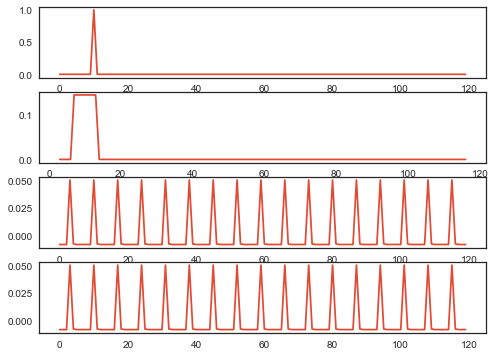

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
var = train_new[train_new['Class'] == 3436]['saleCount']
var = var.values
decomposition = seasonal_decompose(var,freq = 7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(var,label='Original')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.subplot(414)
plt.plot(seasonal, label='Resid')

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
train_new.loc[:,'trend'] = 0
for i in train_new['Class'].unique():
    var = train_new[train_new['Class'] == i]['saleCount']
    var = var.values
    decomposition = seasonal_decompose(var,freq = 7)
    trend = decomposition.trend
    train_new['trend'][train_new['Class'] == i] = trend
train_new['trend'].fillna(0,inplace=True)
train_new['trend']

0         0.000000
1         0.000000
2         0.000000
3         9.000000
4         9.571429
5         9.285714
6         8.857143
7         8.571429
8         9.000000
9         9.000000
10        7.285714
11        7.571429
12        8.285714
13        8.142857
14        8.428571
15        7.285714
16        7.857143
17        9.142857
18        8.714286
19        8.428571
20        8.285714
21        8.285714
22        9.571429
23       10.000000
24       11.428571
25       11.857143
26       11.428571
27       12.000000
28       12.000000
29       10.857143
           ...    
23130     2.571429
23131     2.857143
23132     2.000000
23133     2.714286
23134     2.428571
23135     2.285714
23136     2.142857
23137     2.142857
23138     2.142857
23139     2.142857
23140     2.428571
23141     2.285714
23142     2.285714
23143     2.428571
23144     2.285714
23145     2.142857
23146     2.714286
23147     1.857143
23148     2.142857
23149     2.285714
23150     2.142857
23151     2.

In [54]:
coord = train_new.groupby(['Class','SaleDate'],as_index=False)['trend'].mean()
coord_shift = coord.shift(7)
coord_shift[['Class','SaleDate']] = coord[['Class','SaleDate']]
del train_new['trend']
train_new = pd.merge(train_new, coord_shift, on=['Class','SaleDate'], how='left')
train_new['trend']

0        2.142857
1        2.571429
2        3.857143
3        4.285714
4        0.000000
5        0.000000
6        0.000000
7        0.000000
8        0.000000
9        0.000000
10       9.000000
11       9.571429
12       9.285714
13       8.857143
14       8.571429
15       9.000000
16       9.000000
17       7.285714
18       7.571429
19       8.285714
20       8.142857
21       8.428571
22       7.285714
23       7.857143
24       9.142857
25       8.714286
26       8.428571
27       8.285714
28       8.285714
29       9.571429
           ...   
23130    1.571429
23131    1.571429
23132    2.428571
23133    2.000000
23134    2.285714
23135    1.857143
23136    2.285714
23137    2.571429
23138    2.857143
23139    2.000000
23140    2.714286
23141    2.428571
23142    2.285714
23143    2.142857
23144    2.142857
23145    2.142857
23146    2.142857
23147    2.428571
23148    2.285714
23149    2.285714
23150    2.428571
23151    2.285714
23152    2.142857
23153    2.714286
23154    1

In [38]:
moving_avg = pd.ewma(var,halflife=7)
moving_avg

array([ 1.        ,  0.47526495,  0.30092355,  0.21417847,  0.1624696 ,
        0.12827636,  0.10408951,  0.77538643,  0.97112355,  0.82545328,
        0.8502536 ,  0.73495811,  0.89969181,  0.78659895,  0.81260654,
        0.71623214,  0.63330468,  0.5615226 ,  0.61029196,  0.54354389,
        0.48498008,  0.43342061,  0.38789056,  0.34757761,  0.31179967,
        0.27998006,  0.25162812,  0.32688546,  0.29421871,  0.26498185,
        0.43651871,  0.49197408,  0.44375573,  0.40042504,  0.36145667,
        0.32638726,  0.29480709,  0.2663531 ,  0.24070289,  0.21756968,
        0.29262922,  0.26460331,  0.23929938,  0.21644618,  0.19580075,
        0.17714521,  0.16028403,  0.14504157,  0.22627858,  0.20479384,
        0.18536209,  0.1677848 ,  0.15188306,  0.13749557,  0.21916154,
        0.29306482,  0.26533764,  0.24024216,  0.21752709,  0.19696538,
        0.17835189,  0.16150119,  0.42962814,  0.57793941,  0.52336596,
        0.56836657,  0.70351336,  0.63710965,  0.57698045,  0.52

In [55]:
coord.shift(7)

,Class,SaleDate,trend
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,10.0,2015-01-01,0.000000
8,10.0,2015-01-02,0.000000
9,10.0,2015-01-03,0.000000


In [56]:
coord_shift

,Class,SaleDate,trend
0,10,2015-01-01,NaN
1,10,2015-01-02,NaN
2,10,2015-01-03,NaN
3,10,2015-01-04,NaN
4,10,2015-01-05,NaN
5,10,2015-01-06,NaN
6,10,2015-01-07,NaN
7,10,2015-01-08,0.000000
8,10,2015-01-09,0.000000
9,10,2015-01-10,0.000000
